# Project: Food and Nutrition
-----------------------------------------------
**Data Science Using Python


This is done by exploring a comprehensive dataset on food items, their nutritional attributes, and how they are related to CHOLESTEROL. 

# INTRODUCTION:

> This project is based on analyzing the data from the United States Department of Agriculture’s Food Composition Database.

> Aim is to understand through advanced data analysis the composition of different food categories and their correlation

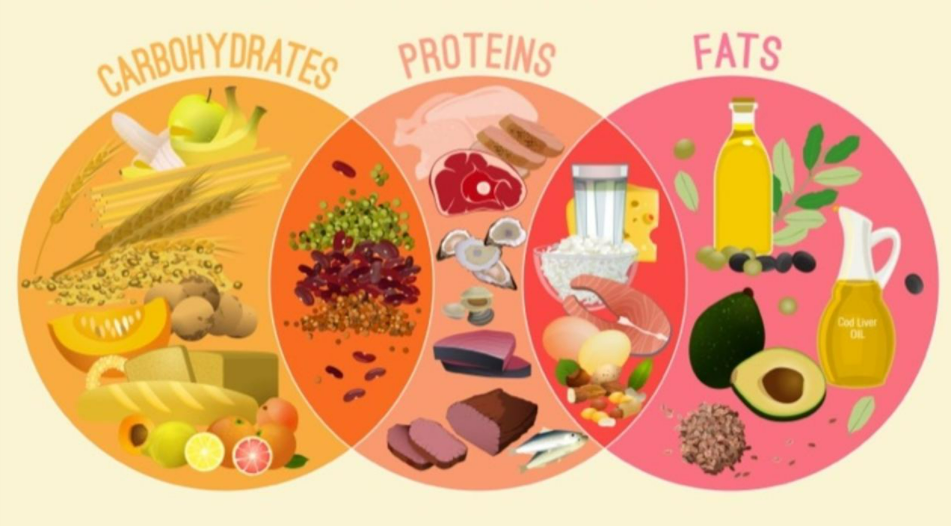


> This analysis is divided into - 

*   Literature Review - A summary of the qualitative analysis done through external secondary research

*   Exploratory Data Analysis - Check for correlation across various food catogories, and their respective nutrient content

*   Predictive Modeling - Run regression modeling - Linear and Logistic to derive accurate models for predicting Cholesterol content in food

*   Conclusion - Summarize findings in terms of nutrients and their relationship with Cholesterol along with optimal models for prediction



# Import Modules

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Read Data from Website
* Reading data from the website and print the shape
* Used Python to count how many nutrients there are (including cholesterol).

In [ ]:
# read the data
# note how we can read from the website if we want to! you can also read from your google drive
df = pd.read_csv('https://corgis-edu.github.io/corgis/datasets/csv/food/food.csv')
df = df.rename(columns={'Data.Fat.Polysaturated Fat': 'Data.Fat.Polyunsaturated Fat', 'Data.Fat.Monosaturated Fat': 'Data.Fat.Monounsaturated Fat'}) # Updating column names - Monosaturated and Polysaturated fats don't exist

df.head(40)

,Category,Description,Nutrient Data Bank Number,Data.Alpha Carotene,Data.Beta Carotene,Data.Beta Cryptoxanthin,Data.Carbohydrate,Data.Cholesterol,Data.Choline,Data.Fiber,...,Data.Major Minerals.Phosphorus,Data.Major Minerals.Potassium,Data.Major Minerals.Sodium,Data.Major Minerals.Zinc,Data.Vitamins.Vitamin A - RAE,Data.Vitamins.Vitamin B12,Data.Vitamins.Vitamin B6,Data.Vitamins.Vitamin C,Data.Vitamins.Vitamin E,Data.Vitamins.Vitamin K
0,Milk,"Milk, human",11000000,0,7,0,6.89,14,16.0,0.0,...,14,51,17,0.17,61,0.05,0.011,5.0,0.08,0.3
1,Milk,"Milk, NFS",11100000,0,4,0,4.87,8,17.9,0.0,...,103,157,39,0.42,59,0.56,0.060,0.1,0.03,0.2
2,Milk,"Milk, whole",11111000,0,7,0,4.67,12,17.8,0.0,...,101,150,38,0.41,32,0.54,0.061,0.0,0.05,0.3
3,Milk,"Milk, low sodium, whole",11111100,0,7,0,4.46,14,16.0,0.0,...,86,253,3,0.38,29,0.36,0.034,0.9,0.08,0.3
4,Milk,"Milk, calcium fortified, whole",11111150,0,7,0,4.67,12,17.8,0.0,...,101,150,38,0.41,32,0.54,0.061,0.0,0.05,0.3
5,Milk,"Milk, calcium fortified, low fat (1%)",11111160,0,1,0,5.19,5,17.4,0.0,...,103,159,39,0.43,58,0.61,0.060,0.0,0.02,0.1
6,Milk,"Milk, calcium fortified, fat free (skim)",11111170,0,0,0,4.85,2,16.0,0.0,...,101,166,52,0.40,137,0.38,0.040,1.0,0.01,0.0
7,Milk,"Milk, reduced fat (2%)",11112110,0,3,0,4.91,8,18.2,0.0,...,103,159,39,0.43,83,0.55,0.061,0.2,0.03,0.2
8,Milk,"Milk, acidophilus, low fat (1%)",11112120,0,1,0,5.19,5,17.4,0.0,...,103,159,39,0.43,58,0.61,0.060,0.0,0.02,0.1
9,Milk,"Milk, acidophilus, reduced fat (2%)",11112130,0,3,0,4.91,8,18.2,0.0,...,103,159,39,0.43,83,0.55,0.061,0.2,0.03,0.2


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7083 entries, 0 to 7082
Data columns (total 38 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Category                        7083 non-null   object 
 1   Description                     7083 non-null   object 
 2   Nutrient Data Bank Number       7083 non-null   int64  
 3   Data.Alpha Carotene             7083 non-null   int64  
 4   Data.Beta Carotene              7083 non-null   int64  
 5   Data.Beta Cryptoxanthin         7083 non-null   int64  
 6   Data.Carbohydrate               7083 non-null   float64
 7   Data.Cholesterol                7083 non-null   int64  
 8   Data.Choline                    7083 non-null   float64
 9   Data.Fiber                      7083 non-null   float64
 10  Data.Lutein and Zeaxanthin      7083 non-null   int64  
 11  Data.Lycopene                   7083 non-null   int64  
 12  Data.Niacin                     70

## Shape of the **DataFrame** & the count of number of Columns pertaining to **nutrients**

In [ ]:
print(df.shape) # Prints the shape of the dataframe

# Count of columns with nutrient data based on naming convention
print('There are %d columns with nutrient information' % len([col for col in df.columns if 'Data.' in col]))

(7083, 38)
There are 35 columns with nutrient information


# Random Sampling
* Shuffling the dataframe with a random seed, and then take a random sample of 90% of the original data without replacement.

In [ ]:
df = df.sample(frac=0.9, replace=False, random_state=4) # Taking a 90% random sample without replace with SEED set to 4 (group number)

# Sorting based on index values
df = df.sort_index()
df

,Category,Description,Nutrient Data Bank Number,Data.Alpha Carotene,Data.Beta Carotene,Data.Beta Cryptoxanthin,Data.Carbohydrate,Data.Cholesterol,Data.Choline,Data.Fiber,...,Data.Major Minerals.Phosphorus,Data.Major Minerals.Potassium,Data.Major Minerals.Sodium,Data.Major Minerals.Zinc,Data.Vitamins.Vitamin A - RAE,Data.Vitamins.Vitamin B12,Data.Vitamins.Vitamin B6,Data.Vitamins.Vitamin C,Data.Vitamins.Vitamin E,Data.Vitamins.Vitamin K
1,Milk,"Milk, NFS",11100000,0,4,0,4.87,8,17.9,0.0,...,103,157,39,0.42,59,0.56,0.060,0.1,0.03,0.2
2,Milk,"Milk, whole",11111000,0,7,0,4.67,12,17.8,0.0,...,101,150,38,0.41,32,0.54,0.061,0.0,0.05,0.3
3,Milk,"Milk, low sodium, whole",11111100,0,7,0,4.46,14,16.0,0.0,...,86,253,3,0.38,29,0.36,0.034,0.9,0.08,0.3
4,Milk,"Milk, calcium fortified, whole",11111150,0,7,0,4.67,12,17.8,0.0,...,101,150,38,0.41,32,0.54,0.061,0.0,0.05,0.3
5,Milk,"Milk, calcium fortified, low fat (1%)",11111160,0,1,0,5.19,5,17.4,0.0,...,103,159,39,0.43,58,0.61,0.060,0.0,0.02,0.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7078,Tomatoes as ingredient in omelet,Tomatoes as ingredient in omelet,99997802,103,464,0,5.48,0,7.4,1.6,...,30,278,6,0.21,43,0.00,0.104,18.2,0.60,8.8
7079,Other vegetables as ingredient in omelet,Other vegetables as ingredient in omelet,99997804,1,11,0,4.81,0,19.4,1.4,...,96,364,6,0.58,1,0.04,0.123,6.3,0.03,0.4
7080,Vegetables as ingredient in curry,Vegetables as ingredient in curry,99997810,368,994,0,11.60,0,14.6,2.2,...,46,312,19,0.28,98,0.00,0.177,16.2,0.24,8.9
7081,Sauce as ingredient in hamburgers,Sauce as ingredient in hamburgers,99998130,0,194,4,17.14,13,20.0,0.6,...,33,190,845,0.21,21,0.04,0.104,2.5,1.90,50.8


# Missing Values
Showing two different ways of checking for missing values per column.

In [ ]:
# We can use .info for checking missing values

df.info()

# Here we can check the non-null count across rows to see which columns have missing values

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6375 entries, 1 to 7082
Data columns (total 38 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Category                        6375 non-null   object 
 1   Description                     6375 non-null   object 
 2   Nutrient Data Bank Number       6375 non-null   int64  
 3   Data.Alpha Carotene             6375 non-null   int64  
 4   Data.Beta Carotene              6375 non-null   int64  
 5   Data.Beta Cryptoxanthin         6375 non-null   int64  
 6   Data.Carbohydrate               6375 non-null   float64
 7   Data.Cholesterol                6375 non-null   int64  
 8   Data.Choline                    6375 non-null   float64
 9   Data.Fiber                      6375 non-null   float64
 10  Data.Lutein and Zeaxanthin      6375 non-null   int64  
 11  Data.Lycopene                   6375 non-null   int64  
 12  Data.Niacin                     63

In [ ]:
# We can also use .isnull().sum()

df.isnull().sum()

# This gives us a summary of missing values (if present) within the dataframe

Category                          0
Description                       0
Nutrient Data Bank Number         0
Data.Alpha Carotene               0
Data.Beta Carotene                0
Data.Beta Cryptoxanthin           0
Data.Carbohydrate                 0
Data.Cholesterol                  0
Data.Choline                      0
Data.Fiber                        0
Data.Lutein and Zeaxanthin        0
Data.Lycopene                     0
Data.Niacin                       0
Data.Protein                      0
Data.Retinol                      0
Data.Riboflavin                   0
Data.Selenium                     0
Data.Sugar Total                  0
Data.Thiamin                      0
Data.Water                        0
Data.Fat.Monounsaturated Fat      0
Data.Fat.Polyunsaturated Fat      0
Data.Fat.Saturated Fat            0
Data.Fat.Total Lipid              0
Data.Major Minerals.Calcium       0
Data.Major Minerals.Copper        0
Data.Major Minerals.Iron          0
Data.Major Minerals.Magnesiu

# Literature Review and Basic EDA



## Net Carbohydrates - Correlation with Fiber & Carbohydrates

*   Knowing how to count carbs is a crucial part of succeeding on ultra low carb diets like keto. Carbs or carbohydrates are sugars in food that supply energy in the form of calories. This includes all types of sugars including starch, fiber, and sugar alcohols.

* Net carbs are thought to represent the number of carbohydrates that are actually absorbed by your body - without impacting blood sugar levels and insulin response. This is because fiber and sugar alcohols aren’t thought to be absorbed.

* Net carbs are only those that are absorbed into your bloodstream by your body. Total carbohydrates include all of the carb components - even those that aren't absorbed.

* There are some variations in the types of fiber and sugar alcohols that may not make this 100% accurate. While the net carb calculation isn't perfect, it's currently the best way to get an idea of how many digestible carbs you're eating.  

 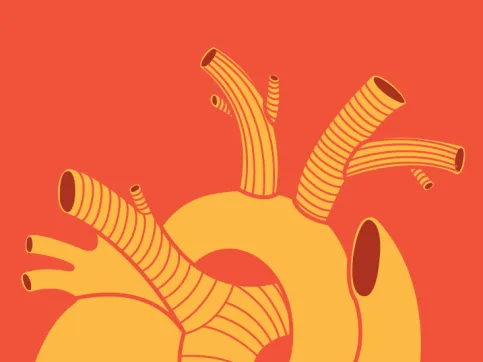

# Dietary Cholesterol - Difference from Blood Cholesterol

* The amount of cholesterol in your diet and the amount of cholesterol in your blood are very different things. Although it may seem logical that eating cholesterol would raise blood cholesterol levels, it usually doesn’t work that way. The body tightly regulates the amount of cholesterol in the blood by controlling its production of cholesterol.

* When your dietary intake of cholesterol goes down, your body makes more. When you eat greater amounts of cholesterol, your body makes less. Because of this, foods high in dietary cholesterol have very little impact on blood cholesterol levels in most people

* While some cholesterol in your diet is fine, lots of saturated fat isn’t. Diets high in saturated fat are linked to increased blood cholesterol and heart disease risk. Experts recommend limiting or avoiding the following “unhealthy” high-cholesterol foods, which are also high in saturated fat:

  > Full Fat Dairy

  > Red Meat

  > Fried Food

  > Baked goods and sweets

# Dietary Cholesterol - Lack of Evidence in Heart Disease

* Cardiovascular disease (CVD) is the leading cause of death in the United States. For years, dietary cholesterol was implicated in increasing blood cholesterol levels leading to the elevated risk of CVD. To date, extensive research did not show evidence to support a role of dietary cholesterol in the development of CVD. As a result, the 2015–2020 Dietary Guidelines for Americans removed the recommendations of restricting dietary cholesterol to 300 mg/day.

# Dietary fat: Knowing which to choose

* Most foods contain a mix of different kinds of fat. For example, canola oil contains some saturated fat but is mostly monounsaturated fat. In contrast, butter contains some unsaturated fat but is mostly saturated fat.

* Saturated fat - This is solid at room temperature. It's found in butter, lard, full-fat milk and yogurt, full-fat cheese, and high-fat meat.
* Unsaturated fat - This tends to be liquid at room temperature. It's found in vegetable oils, fish and nuts.

# How to read the nutrition label correctly

* Step 1: Start with the Serving Size
* Step 2: Compare the Total Calories to Your Individual Needs
* Step 3: Let the Percent Daily Values Be a Guide
* Step 4: Check Out the Nutrition Terms
* Step 5: Choose Low in Saturated Fat, Added Sugars and Sodium
* Step 6: Get Enough Vitamins, Minerals and Dietary Fiber
* Step 7: Consider the Additional Nutrients

# Why to choose food with low Carbohydrate content

* Carbs are an excellent source of energy for active individuals, but sedentary people should limit their carbohydrate intake to maintain an ideal weight. The recommended daily amount of carbs for the average adult is 130 grams, or between 45% and 65% of your total calorie intake. 

* High-carb diets have been connected to a higher risk of chronic disease, decreased physical activity, and obesity. However, carbohydrate quality has been shown to play a more critical role in health than the amount of carbs. 

* Carb intake from processed grains, potatoes, and added sugars may increase the risk of obesity, diabetes, cardiovascular disease, and some cancers. However, non-starchy vegetables, whole fruits, legumes, and whole-grains have been shown to be healthful.

* Carb intake from processed grains, potatoes, and added sugars may increase the risk of:

> Metabolic Disease

> Obesity

> Diabetes

> Cardiovascular Disease

# The importance of each Vitamin type in our diet

 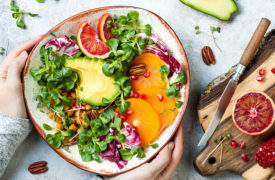

**Vitamin A**
Vitamin A is a fat-soluble vitamin also known as retinol. The RDA of vitamin A is 700 micrograms for women and 900 micrograms for men. Vitamin A is in many dairy products and yellow- or orange-colored fruits and vegetables.

“Fruits like cantaloupe, mangoes and apricots are good options,” says Patton.

Vitamin A benefits:

Helps fight infection.
Maintains healthy vision.
Plays a key role in heart, lung and kidney health.
Keeps skin healthy by fighting off toxins (also called free radicals).
Strengthens bones and teeth.

**Vitamin B**
There are eight B vitamins, which make up vitamin B complex, with varying RDAs. According to the United States Department of Agriculture (USDA), most Americans don’t get their RDA of B vitamins in their daily nutrition.

In the U.S., many cereals, flour, breads and pastas are routinely fortified with B vitamins to minimize the risk of deficiency. B vitamins are in leafy green vegetables, animal proteins and whole grains.

“The majority of B vitamins are used to turn food into energy,” says Patton. “And also used a lot for growth, development and the creation of cells.”

Vitamin B benefits:

Maintains normal brain function and memory.
Needed for normal metabolism of carbohydrate, protein and fats.
Improves cholesterol by lowering LDL (bad cholesterol) and increasing HDL (good cholesterol).
Reduces risk of heart disease.
Reduces risk of stroke.
Necessary for normal blood cell production and nervous system function.

**Vitamin C**
Vitamin C is a water-soluble vitamin containing antioxidants that promote healthy tissue growth. The RDA for men is 90 milligrams and 75 milligrams for women. Vitamin C can be found in many fruits and vegetables.

“Vitamin C helps protect your cells from the damage of free radicals,” says Patton. “It’s also used to help make collagen in your bodies.”

Vitamin C benefits:

May reduce risk of getting the common cold.
Maintains skin and tissue health.
Strengthens bones and teeth.
For those who have an iron deficiency, vitamin C can help your body absorb it better. “If you’re trying to maximize your iron absorption, having more vitamin C is beneficial,” she adds.

**Vitamin D**
Vitamin D is an essential fat-soluble vitamin that is activated by ultraviolet (UV) light. Besides getting from sun exposure, vitamin D can also be found in cod liver oil, fatty fish, fortified juices, milk and cereals. These can be a healthy alternative when a person does not get enough UV light. For children and adults, the RDA is 15 micrograms (600 IU). For ages 70 and older it is 20 micrograms (800 IU).

“Vitamin D deficiencies are pretty common,” says Patton. “Doctors may test your vitamin D levels and sometimes they are low enough that people need a prescription-strength dose of vitamin D.”

Vitamin D benefits:

Influences immune cell function.
Maintains nervous system functions.
Needed for bone health.
Regulates blood levels of calcium and phosphorus.

**Vitamin E**
Vitamin E is an important vitamin for organ function. You should get 15 milligrams daily. Sources of vitamin E include vegetable oils, avocados, spinach, seeds and nuts, and whole grains.

“Vitamin E has the antioxidant benefits of keeping your immune system strong, but also can help with dilating blood vessels and preventing blood clots,” says Patton.

Vitamin E benefits:

Protects cells from damage from toxins.
Maintains muscle function.
Reduces risk of cancer.
Reduces risk of heart disease.
Reduces risk of Alzheimer’s disease.

**Vitamin K**
Vitamin K is essential for blood clotting. The RDA of vitamin K is 120 micrograms for men and 90 micrograms for women. This protein-rich vitamin is mainly found in leafy green vegetables.

“Vitamin K also plays a role with calcium in keeping your bones really healthy,” says Patton.

Vitamin K benefits:

Helps in rapid wound healing.
Creates strong bones.
Helps protect against heart disease.


**Citations**
1. "How to Calculate Net Carbs for Keto in 2 Simple Steps" (https://www.trifectanutrition.com/blog/how-to-calculate-net-carbs-for-keto-in-2-simple-steps)
2. "Why Dietary Cholesterol Does Not Matter (For Most People)" (https://www.healthline.com/nutrition/dietary-cholesterol-does-not-matter)
3. "High-Cholesterol Foods to Eat and Avoid" (https://health.clevelandclinic.org/high-cholesterol-foods-to-eat-and-avoid/)
4. "Balanced Diet: What Is It and How to Achieve It - Healthline" (https://www.healthline.com/health/balanced-diet)
5. "How Does Food Impact Health?" (https://www.takingcharge.csh.umn.edu/how-does-food-impact-health)
6. "9 Vitamins and Minerals You Should Take Daily" (https://health.clevelandclinic.org/which-vitamins-should-you-take/)
7. "Dietary Cholesterol and the Lack of Evidence in Cardiovascular Disease" (https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6024687/)
8. "Worst Foods High in Carbs" (https://www.webmd.com/diet/foods-high-in-carbs)
9. "Dietary fat: Know which to choose" (https://www.mayoclinic.org/healthy-lifestyle/nutrition-and-healthy-eating/in-depth/fat/art-20045550)
10. "The Basics of the Nutrition Facts Label" (https://www.eatright.org/food/nutrition/nutrition-facts-and-food-labels/the-basics-of-the-nutrition-facts-label)




## Unique values from `Category`
* Counting how many unique values are in `df['Category']`
* frequency table of how many entries exist per `df['Category']`. Which categories are most common?
* histogram from the frequency table that is calculated.

In [ ]:
cat_unique = df['Category'].nunique() # Storing number of unique values within the column CATEGORY
print('There are %d unique values in the CATEGORY column' % cat_unique)

There are 2252 unique values in the CATEGORY column


In [ ]:
cat_freq = df['Category'].value_counts() # Counting and storing frequency of each type within column 'CATEGORY'
cat_freq.head(n=30) # Viewing the most common 30 values

Infant formula                     157
Rice                               132
Bread                              102
Potato                              92
Cookie                              87
Frankfurter or hot dog sandwich     84
Coffee                              77
Egg omelet or scrambled egg         71
Pie                                 69
Beef                                68
Cheese                              58
Pasta                               50
Crackers                            48
Chocolate milk                      46
Chicken                             40
Chicken or turkey                   39
Tea                                 39
Oatmeal                             39
Pretzels                            38
Pizza                               37
Turkey                              37
Cheese sandwich                     36
Pork                                36
Roll                                31
Muffin                              31
Yogurt                   

### There are 14 categories with frequency over 50. Most common (with values >= 100) are as follows:

> Infant Formula

> Rice

> Bread

> Potato

> Cookie


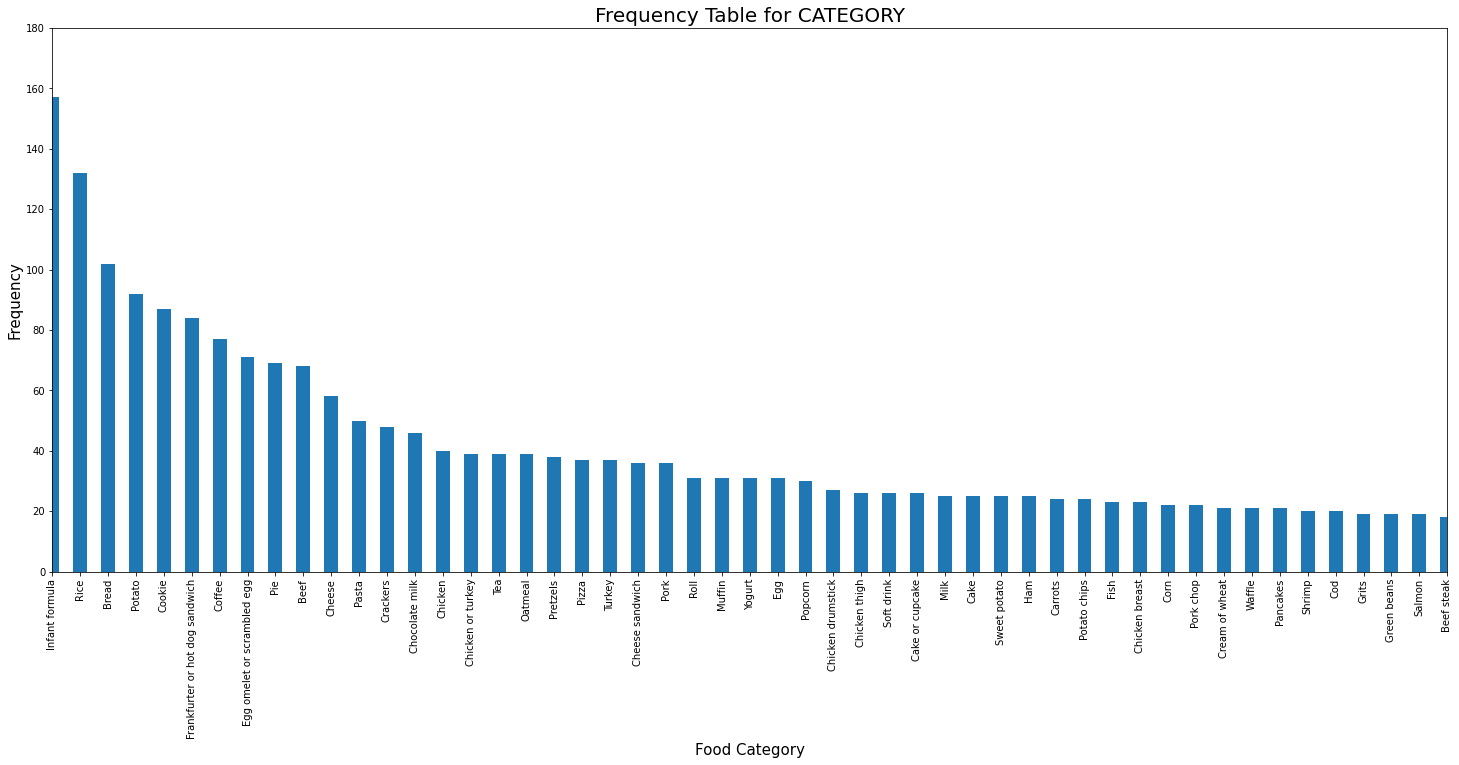

In [ ]:
fig, ax = plt.subplots(figsize=(25, 10))
df['Category'].value_counts().plot.bar()
plt.xlim([0,50])
plt.ylim([0,180])
plt.xlabel('Food Category', size = 15)
plt.ylabel('Frequency', size = 15)
plt.title('Frequency Table for CATEGORY', size = 20)
plt.show()

## Correlation


### Correlation - Entire Data

> All the columns are selected for this analysis. We can see that despite the color coding in the correlation matrix, it is difficult to make sense of the information due to its vastness.

In [ ]:
# entire dataset
a1 = df.corr()
a1.style.background_gradient(cmap='coolwarm').set_precision(2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  This is separate from the ipykernel package so we can avoid doing imports until


,Nutrient Data Bank Number,Data.Alpha Carotene,Data.Beta Carotene,Data.Beta Cryptoxanthin,Data.Carbohydrate,Data.Cholesterol,Data.Choline,Data.Fiber,Data.Lutein and Zeaxanthin,Data.Lycopene,Data.Niacin,Data.Protein,Data.Retinol,Data.Riboflavin,Data.Selenium,Data.Sugar Total,Data.Thiamin,Data.Water,Data.Fat.Monounsaturated Fat,Data.Fat.Polyunsaturated Fat,Data.Fat.Saturated Fat,Data.Fat.Total Lipid,Data.Major Minerals.Calcium,Data.Major Minerals.Copper,Data.Major Minerals.Iron,Data.Major Minerals.Magnesium,Data.Major Minerals.Phosphorus,Data.Major Minerals.Potassium,Data.Major Minerals.Sodium,Data.Major Minerals.Zinc,Data.Vitamins.Vitamin A - RAE,Data.Vitamins.Vitamin B12,Data.Vitamins.Vitamin B6,Data.Vitamins.Vitamin C,Data.Vitamins.Vitamin E,Data.Vitamins.Vitamin K
Nutrient Data Bank Number,1.00,0.09,0.17,0.06,0.26,-0.29,-0.38,0.17,0.13,0.03,-0.14,-0.51,-0.04,-0.07,-0.22,0.25,-0.01,-0.02,-0.09,0.01,-0.10,-0.09,-0.16,-0.03,-0.00,0.01,-0.35,-0.08,-0.23,-0.15,0.03,-0.17,-0.04,0.20,0.06,0.13
Data.Alpha Carotene,0.09,1.00,0.53,0.01,-0.06,-0.05,-0.07,0.03,0.04,0.00,-0.06,-0.11,-0.03,-0.05,-0.05,-0.04,-0.03,0.12,-0.06,-0.04,-0.07,-0.07,-0.06,-0.02,-0.04,-0.05,-0.10,0.01,-0.06,-0.04,0.22,-0.04,-0.03,0.04,-0.01,0.03
Data.Beta Carotene,0.17,0.53,1.00,0.03,-0.08,-0.08,-0.09,0.08,0.46,0.01,-0.10,-0.16,-0.03,-0.06,-0.09,-0.05,-0.05,0.16,-0.08,-0.05,-0.09,-0.09,-0.02,-0.02,-0.04,-0.02,-0.14,0.08,-0.09,-0.06,0.36,-0.06,-0.01,0.15,0.03,0.44
Data.Beta Cryptoxanthin,0.06,0.01,0.03,1.00,0.02,-0.02,-0.03,0.05,0.05,0.02,-0.04,-0.07,-0.01,-0.03,-0.04,0.06,-0.02,0.03,-0.03,-0.02,-0.04,-0.04,-0.03,-0.01,-0.03,-0.02,-0.06,0.02,-0.04,-0.03,0.01,-0.02,-0.02,0.13,0.00,0.03
Data.Carbohydrate,0.26,-0.06,-0.08,0.02,1.00,-0.23,-0.23,0.49,-0.07,-0.08,0.24,-0.17,0.08,0.26,-0.04,0.69,0.28,-0.81,0.05,0.11,0.08,0.09,0.17,0.10,0.42,0.31,0.10,0.12,0.05,0.10,0.05,-0.02,0.20,0.07,0.10,-0.09
Data.Cholesterol,-0.29,-0.05,-0.08,-0.02,-0.23,1.00,0.76,-0.20,-0.02,-0.04,0.07,0.40,0.16,0.12,0.21,-0.15,-0.04,-0.01,0.13,0.03,0.19,0.16,0.03,0.11,-0.02,-0.05,0.27,0.04,0.16,0.09,0.12,0.24,0.04,-0.10,-0.01,-0.05
Data.Choline,-0.38,-0.07,-0.09,-0.03,-0.23,0.76,1.00,-0.12,-0.02,-0.06,0.22,0.64,0.23,0.22,0.30,-0.17,0.04,-0.09,0.18,0.07,0.12,0.17,0.04,0.23,0.06,0.15,0.48,0.27,0.23,0.20,0.18,0.39,0.15,-0.11,0.04,-0.05
Data.Fiber,0.17,0.03,0.08,0.05,0.49,-0.20,-0.12,1.00,0.08,-0.01,0.24,-0.02,0.03,0.20,0.02,0.14,0.28,-0.45,0.13,0.18,0.00,0.13,0.14,0.22,0.35,0.60,0.26,0.32,0.01,0.16,0.06,-0.00,0.29,0.10,0.21,0.06
Data.Lutein and Zeaxanthin,0.13,0.04,0.46,0.05,-0.07,-0.02,-0.02,0.08,1.00,-0.02,-0.06,-0.10,-0.01,0.00,-0.05,-0.07,-0.02,0.12,-0.06,-0.04,-0.07,-0.07,0.05,-0.01,0.02,0.06,-0.08,0.07,-0.05,-0.02,0.16,-0.04,0.00,0.17,0.03,0.84
Data.Lycopene,0.03,0.00,0.01,0.02,-0.08,-0.04,-0.06,-0.01,-0.02,1.00,-0.03,-0.06,-0.04,-0.05,-0.02,-0.07,-0.03,0.10,-0.05,-0.05,-0.06,-0.06,-0.04,-0.02,-0.04,-0.05,-0.07,0.02,0.04,-0.03,-0.03,-0.03,-0.04,0.03,-0.00,-0.02


###Correlation - Fat-Related

>Data.Fat.Monosaturated Fat, Data.Fat.Polyunsaturated Fat, Data.Fat.Saturated Fat and Data.Fat.Total Lipid are the fat-related columns selected for this analysis.

>No negative correlation can be observed. We can see that all the fat - related columns are highly correlated, except for polyunsaturated fat and saturated fat.

>The fundamental structure of polyunsaturated and saturated fats are different. Saturated fat occurs mainly in products like butter, oil, etc., whereas polyunsaturated fat can be found mostly in nuts, seeds, fish, algae, leafy greens, etc. 



In [ ]:
# fat related
dffat = df[df.columns[pd.Series(df.columns).str.startswith('Data.Fat')]]
a2 = dffat.corr()
a2.style.background_gradient(cmap='coolwarm').set_precision(2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  after removing the cwd from sys.path.


,Data.Fat.Monounsaturated Fat,Data.Fat.Polyunsaturated Fat,Data.Fat.Saturated Fat,Data.Fat.Total Lipid
Data.Fat.Monounsaturated Fat,1.00,0.62,0.58,0.90
Data.Fat.Polyunsaturated Fat,0.62,1.00,0.32,0.77
Data.Fat.Saturated Fat,0.58,0.32,1.00,0.78
Data.Fat.Total Lipid,0.90,0.77,0.78,1.00


### Correlation - Major Minerals - Related
>Data.Major Minerals.Calcium, Data.Major Minerals.Copper, Data.Major Minerals.Iron, Data.Major Minerals.Magnesium, Data.Major Minerals.Phosphorus, Data.Major Minerals.Potassium, Data.Major Minerals.Sodium and Data.Major Minerals.Zinc are the major minerals- related columns selected for this analysis.

>No negative correlation can be observed. Phosphorus - Calcium, Phosphorus - Magnesium and Potassium - Magnesium can be observed to have the highest correlation values of 0.52, 0.58 and 0.56 respectively.

>Dairy products,dark green, leafy vegetables, fish, soy products, cereals, fruit juice, and milk alternatives are rich in calcium and phosphorus.

>Chocolate, avocados, nuts,  legumes, tofu, seeds, whole Grains and fish are rich in magnesium and phosphorus.

>Fruits and vegetables are rich in magnesium and potassium.

In [ ]:
dfmm = df[df.columns[pd.Series(df.columns).str.startswith('Data.Major Minerals')]]
a3 = dfmm.corr()
a3.style.background_gradient(cmap='coolwarm').set_precision(2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  This is separate from the ipykernel package so we can avoid doing imports until


,Data.Major Minerals.Calcium,Data.Major Minerals.Copper,Data.Major Minerals.Iron,Data.Major Minerals.Magnesium,Data.Major Minerals.Phosphorus,Data.Major Minerals.Potassium,Data.Major Minerals.Sodium,Data.Major Minerals.Zinc
Data.Major Minerals.Calcium,1.00,0.08,0.30,0.28,0.52,0.14,0.16,0.21
Data.Major Minerals.Copper,0.08,1.00,0.19,0.38,0.29,0.23,0.03,0.41
Data.Major Minerals.Iron,0.30,0.19,1.00,0.34,0.26,0.16,0.10,0.42
Data.Major Minerals.Magnesium,0.28,0.38,0.34,1.00,0.58,0.56,0.10,0.28
Data.Major Minerals.Phosphorus,0.52,0.29,0.26,0.58,1.00,0.47,0.34,0.31
Data.Major Minerals.Potassium,0.14,0.23,0.16,0.56,0.47,1.00,0.15,0.15
Data.Major Minerals.Sodium,0.16,0.03,0.10,0.10,0.34,0.15,1.00,0.13
Data.Major Minerals.Zinc,0.21,0.41,0.42,0.28,0.31,0.15,0.13,1.00


### Correlation - Vitamins Related

>Data.Vitamins.Vitamin A - RAE,	Data.Vitamins.Vitamin, B12	Data.Vitamins.Vitamin B6,	Data.Vitamins.Vitamin C,	Data.Vitamins.Vitamin E and	Data.Vitamins.Vitamin K are the vitamins-related columns selected for this analysis.

>Vitamin A and Vitamin B12 show a high correlation of 0.60. All other vitamins have a low or moderate correlation with each other.

>Vitamin A can be found in beef, fish, eggs, dairy products, etc.

>Vitamin B12 can be found in beef, fish, eggs, dairy products, etc., explaining the high correlation between Vitamin A and Vitamin B12. 

In [ ]:
dfv = df[df.columns[pd.Series(df.columns).str.startswith('Data.Vitamins')]]
a4 = dfv.corr()
a4.style.background_gradient(cmap='coolwarm').set_precision(2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  This is separate from the ipykernel package so we can avoid doing imports until


,Data.Vitamins.Vitamin A - RAE,Data.Vitamins.Vitamin B12,Data.Vitamins.Vitamin B6,Data.Vitamins.Vitamin C,Data.Vitamins.Vitamin E,Data.Vitamins.Vitamin K
Data.Vitamins.Vitamin A - RAE,1.00,0.60,0.30,0.13,0.13,0.16
Data.Vitamins.Vitamin B12,0.60,1.00,0.38,0.05,0.09,-0.04
Data.Vitamins.Vitamin B6,0.30,0.38,1.00,0.20,0.28,-0.00
Data.Vitamins.Vitamin C,0.13,0.05,0.20,1.00,0.10,0.22
Data.Vitamins.Vitamin E,0.13,0.09,0.28,0.10,1.00,0.07
Data.Vitamins.Vitamin K,0.16,-0.04,-0.00,0.22,0.07,1.00


###  Correlation - Alpha Carotene through and including Water
>All columns from Alpha Carotene through and including are the columns selected for this analysis.

>Alpha and Beta carotene can be observed to have a high correlation of 0.53. 

>Sugar and carbohydrates have a high correlation value of 0.69.

>Water and carbohydrates have a high negative correlation of -0.81 as it is extremely unlikely for food products rich in carbs to have significant amounts of water.

>Choline and protein have a high correlation of 0.64. This could be attributed to choline occuring in protein - rich foods.

>Riboflavin (Vitamin B2), Niacin (Vitamin B3) and Thiamin (Vitamin B1) have a high correlation with each other. They can be found in a variety of protiens such as beef, chicken, fish, etc.

In [ ]:
dfna = df.loc[:, 'Data.Alpha Carotene':'Data.Water']
a5 = dfna.corr()
a5.style.background_gradient(cmap='coolwarm').set_precision(2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  This is separate from the ipykernel package so we can avoid doing imports until


,Data.Alpha Carotene,Data.Beta Carotene,Data.Beta Cryptoxanthin,Data.Carbohydrate,Data.Cholesterol,Data.Choline,Data.Fiber,Data.Lutein and Zeaxanthin,Data.Lycopene,Data.Niacin,Data.Protein,Data.Retinol,Data.Riboflavin,Data.Selenium,Data.Sugar Total,Data.Thiamin,Data.Water
Data.Alpha Carotene,1.00,0.53,0.01,-0.06,-0.05,-0.07,0.03,0.04,0.00,-0.06,-0.11,-0.03,-0.05,-0.05,-0.04,-0.03,0.12
Data.Beta Carotene,0.53,1.00,0.03,-0.08,-0.08,-0.09,0.08,0.46,0.01,-0.10,-0.16,-0.03,-0.06,-0.09,-0.05,-0.05,0.16
Data.Beta Cryptoxanthin,0.01,0.03,1.00,0.02,-0.02,-0.03,0.05,0.05,0.02,-0.04,-0.07,-0.01,-0.03,-0.04,0.06,-0.02,0.03
Data.Carbohydrate,-0.06,-0.08,0.02,1.00,-0.23,-0.23,0.49,-0.07,-0.08,0.24,-0.17,0.08,0.26,-0.04,0.69,0.28,-0.81
Data.Cholesterol,-0.05,-0.08,-0.02,-0.23,1.00,0.76,-0.20,-0.02,-0.04,0.07,0.40,0.16,0.12,0.21,-0.15,-0.04,-0.01
Data.Choline,-0.07,-0.09,-0.03,-0.23,0.76,1.00,-0.12,-0.02,-0.06,0.22,0.64,0.23,0.22,0.30,-0.17,0.04,-0.09
Data.Fiber,0.03,0.08,0.05,0.49,-0.20,-0.12,1.00,0.08,-0.01,0.24,-0.02,0.03,0.20,0.02,0.14,0.28,-0.45
Data.Lutein and Zeaxanthin,0.04,0.46,0.05,-0.07,-0.02,-0.02,0.08,1.00,-0.02,-0.06,-0.10,-0.01,0.00,-0.05,-0.07,-0.02,0.12
Data.Lycopene,0.00,0.01,0.02,-0.08,-0.04,-0.06,-0.01,-0.02,1.00,-0.03,-0.06,-0.04,-0.05,-0.02,-0.07,-0.03,0.10
Data.Niacin,-0.06,-0.10,-0.04,0.24,0.07,0.22,0.24,-0.06,-0.03,1.00,0.46,0.27,0.74,0.22,0.02,0.71,-0.37


## Feature Engineering: Net Carbs


In [ ]:
df['NetCarbs']=df['Data.Carbohydrate']-df['Data.Fiber']

### Correlation check


> There exists a negative correlation between NetCarbs and Cholesterol however, it is very small and not relevant in terms of modeling



In [ ]:
dfncc=df[['Data.Cholesterol','NetCarbs']]
dfncc.corr() # Check for correlation

,Data.Cholesterol,NetCarbs
Data.Cholesterol,1.000000,-0.212566
NetCarbs,-0.212566,1.000000


### Scatter Plot check


> No  relationship could be observed between NetCarbs and Cholesterol in the scatter plot which make biological sense.


> Increment in NetCarbs should theorectically show an increment in Cholesterol, which was not evident in the dataset





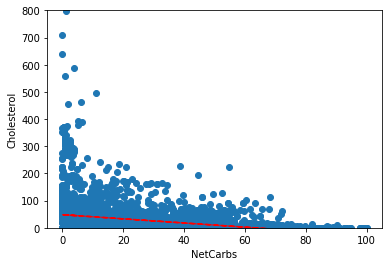

In [ ]:
# Storing data in x and y variables for a scatter plot

x = df['NetCarbs']
y = df['Data.Cholesterol']

plt.scatter(x, y)
plt.ylim([0,800])
plt.xlabel('NetCarbs')
plt.ylabel('Cholesterol')

# Preparing a trendline
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")

plt.show()

### **Food Analysis** - NetCarbs


In [ ]:
# Sorting in ascending order to view lowest (bottom 50) NetCarb values and food categories
df_tmp = df.sort_values(by=['NetCarbs'])
df_tmp.head(n=50)

# We can observe that PROTEINS have the lowest 'NetCarbs'

,Category,Description,Nutrient Data Bank Number,Data.Alpha Carotene,Data.Beta Carotene,Data.Beta Cryptoxanthin,Data.Carbohydrate,Data.Cholesterol,Data.Choline,Data.Fiber,...,Data.Major Minerals.Potassium,Data.Major Minerals.Sodium,Data.Major Minerals.Zinc,Data.Vitamins.Vitamin A - RAE,Data.Vitamins.Vitamin B12,Data.Vitamins.Vitamin B6,Data.Vitamins.Vitamin C,Data.Vitamins.Vitamin E,Data.Vitamins.Vitamin K,NetCarbs
7082,Industrial oil as ingredient in food,Industrial oil as ingredient in food,99998210,0,0,0,0.0,0,0.2,0.0,...,0,0,0.01,0,0.00,0.000,0.0,10.50,155.8,0.0
852,Goat ribs,"Goat ribs, cooked",23150300,0,0,0,0.0,74,105.5,0.0,...,402,408,5.23,0,1.18,0.000,0.0,0.34,1.2,0.0
853,Veal,"Veal, NS as to cut, cooked, NS as to fat eaten",23200100,0,0,0,0.0,113,115.6,0.0,...,322,409,4.72,0,1.56,0.307,0.0,0.40,6.5,0.0
855,Veal,"Veal, NS as to cut, cooked, lean only eaten",23200120,0,0,0,0.0,117,122.0,0.0,...,335,411,5.06,0,1.64,0.327,0.0,0.42,6.5,0.0
856,Veal chop,"Veal chop, NS as to cooking method, NS as to f...",23201010,0,0,0,0.0,102,98.9,0.0,...,322,415,3.00,0,1.23,0.337,0.0,0.44,5.5,0.0
857,Veal chop,"Veal chop, NS as to cooking method, lean and f...",23201020,0,0,0,0.0,102,98.9,0.0,...,322,415,3.00,0,1.23,0.337,0.0,0.44,5.5,0.0
858,Veal chop,"Veal chop, NS as to cooking method, lean only ...",23201030,0,0,0,0.0,105,104.4,0.0,...,337,418,3.21,0,1.30,0.367,0.0,0.49,5.5,0.0
862,Veal chop,"Veal chop, broiled, NS as to fat eaten",23203100,0,0,0,0.0,102,98.9,0.0,...,322,415,3.00,0,1.23,0.337,0.0,0.44,5.5,0.0
850,Goat,"Goat, baked",23150250,0,0,0,0.0,74,105.5,0.0,...,402,408,5.23,0,1.18,0.000,0.0,0.34,1.2,0.0
863,Veal chop,"Veal chop, broiled, lean and fat eaten",23203110,0,0,0,0.0,102,98.9,0.0,...,322,415,3.00,0,1.23,0.337,0.0,0.44,5.5,0.0


In [ ]:
# Sorting in descending order to view highest (top 50) NetCarb values and food categories

df_tmp = df.sort_values(by=['NetCarbs'], ascending=False)
df_tmp.head(n=50)

# We can observe that SUGARs, SUGAR substitutes, Candies, etc. have the highest 'NetCarbs'

,Category,Description,Nutrient Data Bank Number,Data.Alpha Carotene,Data.Beta Carotene,Data.Beta Cryptoxanthin,Data.Carbohydrate,Data.Cholesterol,Data.Choline,Data.Fiber,...,Data.Major Minerals.Potassium,Data.Major Minerals.Sodium,Data.Major Minerals.Zinc,Data.Vitamins.Vitamin A - RAE,Data.Vitamins.Vitamin B12,Data.Vitamins.Vitamin B6,Data.Vitamins.Vitamin C,Data.Vitamins.Vitamin E,Data.Vitamins.Vitamin K,NetCarbs
6431,Sugar substitute,"Sugar substitute, monk fruit, powder",91108020,0,0,0,100.00,0,0.0,0.0,...,0,0,0.00,0,0.00,0.000,0.0,0.00,0.0,100.00
6429,Sugar substitute,"Sugar substitute, stevia, powder",91108000,0,0,0,100.00,0,0.0,0.0,...,0,0,0.00,0,0.00,0.000,0.0,0.00,0.0,100.00
6424,Sugar,"Sugar, white, confectioner's, powdered",91101020,0,0,0,99.77,0,0.0,0.0,...,2,2,0.01,0,0.00,0.000,0.0,0.00,0.0,99.77
6423,Sugar,"Sugar, white, granulated or lump",91101010,0,0,0,99.60,0,0.0,0.0,...,2,1,0.01,0,0.00,0.000,0.0,0.00,0.0,99.60
6422,Sugar,"Sugar, NFS",91101000,0,0,0,99.60,0,0.0,0.0,...,2,1,0.01,0,0.00,0.000,0.0,0.00,0.0,99.60
6427,Sugar substitute and sugar blend,Sugar substitute and sugar blend,91106010,0,0,0,99.35,0,0.0,0.0,...,2,1,0.01,0,0.00,0.000,0.0,0.00,0.0,99.35
372,Strawberry beverage powder,"Strawberry beverage powder, dry mix, not recon...",11830400,0,0,0,99.10,0,0.1,0.0,...,6,38,0.00,0,0.00,0.002,0.3,0.00,0.0,99.10
6602,Gumdrops,Gumdrops,91745010,0,0,0,98.90,0,0.0,0.1,...,5,44,0.00,0,0.00,0.005,0.0,0.00,0.0,98.80
6617,Dietetic or low calorie candy,"Dietetic or low calorie candy, NFS",91770000,0,0,0,98.60,0,0.0,0.0,...,0,0,0.00,0,0.00,0.000,0.0,0.00,0.0,98.60
6621,Dietetic or low calorie mints,Dietetic or low calorie mints,91770050,0,0,0,98.60,0,0.0,0.0,...,0,0,0.00,0,0.00,0.000,0.0,0.00,0.0,98.60


### **FINAL OBSERVATIONS**

> **PROTEINS** have the **lowest** 'NetCarbs'

> **SUGARs, SUGAR substitutes, Candies**, etc. have the **highest** 'NetCarbs'

> Both **CATEGORIES** have **0** to **negligible** values of **Alpha.Carotene, Beta.Carotene, Beta.Cryptoxanthin**


# Advanced EDA


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6375 entries, 1 to 7082
Data columns (total 39 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Category                        6375 non-null   object 
 1   Description                     6375 non-null   object 
 2   Nutrient Data Bank Number       6375 non-null   int64  
 3   Data.Alpha Carotene             6375 non-null   int64  
 4   Data.Beta Carotene              6375 non-null   int64  
 5   Data.Beta Cryptoxanthin         6375 non-null   int64  
 6   Data.Carbohydrate               6375 non-null   float64
 7   Data.Cholesterol                6375 non-null   int64  
 8   Data.Choline                    6375 non-null   float64
 9   Data.Fiber                      6375 non-null   float64
 10  Data.Lutein and Zeaxanthin      6375 non-null   int64  
 11  Data.Lycopene                   6375 non-null   int64  
 12  Data.Niacin                     63

## Item 1: Scatterplot

# **Choline vs. Cholesterol**

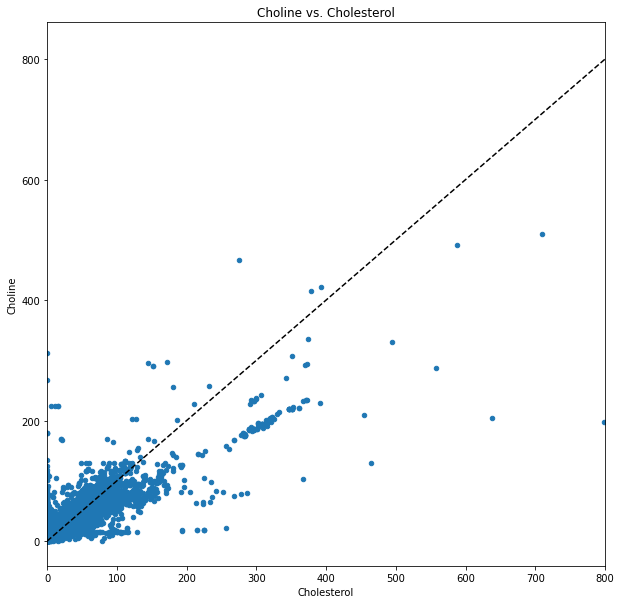

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))
df.plot.scatter(y='Data.Choline', x='Data.Cholesterol', ax = ax) 
plt.xlabel("Cholesterol")
plt.ylabel("Choline")
plt.title("Choline vs. Cholesterol")
plt.xlim([0,800])
plt.plot([0, 800], [0, 800], '--k')
plt.show()



> We observe a positive incremental relationship between **Choline** and **Cholesterol**

> Foods high in **Choline** are also the ones high in "**Dietary Cholesterol**"

> Examples of food high in **Choline** & **Cholesterol** - Red Meat, Eggs, Shellfish, etc.







## Item 2: **Cholesterol vs Protein**

> Owing to moderately high correlation of Cholesterol and Protein at 0.4, we wanted create a repository of Food catogories and their respective Cholesterol and Protein values



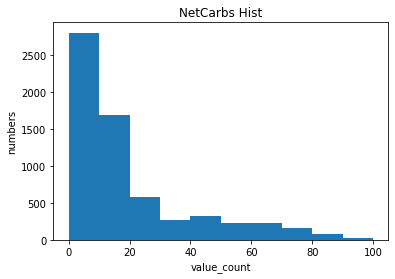

In [ ]:
df_tmp3 = df[['Category', 'Data.Protein', 'Data.Cholesterol']]
df_tmp3.sort_values(by=['Data.Cholesterol'], ascending=False)



> We can infer that high protein value in food points towards a high cholesterol content

> Brains, Breaded brains, Egg, etc have the highest Cholesterol content

> This is validated by the general medicinal recommendation - Reduction in protein for patients with high blood cholesterol 





## Item 3: **Frequency of cholesterol level** across food categories

> We removed food categories with Cholesterol = 0 to observe the frequency of cholesterol level across food categories 


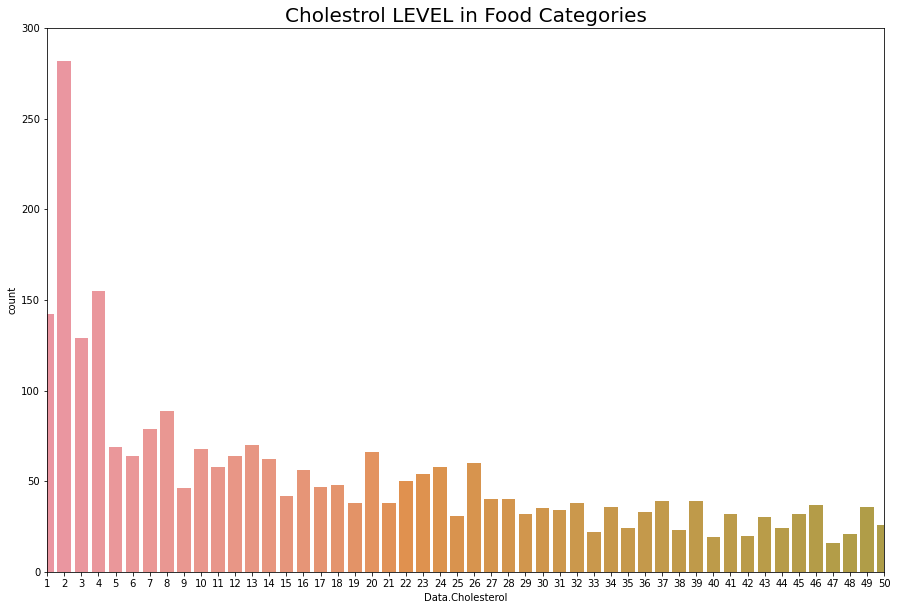

In [ ]:
fig, ax = plt.subplots(figsize=(15, 10))
sns.countplot(x = df['Data.Cholesterol'])
plt.xlim([1,50])
plt.ylim([0,300])
plt.title('Cholestrol LEVEL in Food Categories', size = 20)
plt.show()

### Observations:

> Most of the food categories have very low levels of dietary cholesterol

> Dietary cholesterol irrespective of carbohydrate and protein content does not have direct correlation with blood cholesterol and hence, is not a proper determinor of a food category's health value


## Item 4: **High Carbohydrate Foods Vs. Vitamin Content**

In [ ]:
df_tmp1 = df.sort_values(by=['NetCarbs'], ascending=False)
df_tmp2 = df_tmp1.iloc[0:50,32:38]
df_tmp3 = df_tmp1.iloc[0:50,0]
df_tmp1 = pd.concat((df_tmp3, df_tmp2),axis = 1)
df_tmp1

,Category,Data.Vitamins.Vitamin A - RAE,Data.Vitamins.Vitamin B12,Data.Vitamins.Vitamin B6,Data.Vitamins.Vitamin C,Data.Vitamins.Vitamin E,Data.Vitamins.Vitamin K
6431,Sugar substitute,0,0.00,0.000,0.0,0.00,0.0
6429,Sugar substitute,0,0.00,0.000,0.0,0.00,0.0
6424,Sugar,0,0.00,0.000,0.0,0.00,0.0
6423,Sugar,0,0.00,0.000,0.0,0.00,0.0
6422,Sugar,0,0.00,0.000,0.0,0.00,0.0
6427,Sugar substitute and sugar blend,0,0.00,0.000,0.0,0.00,0.0
372,Strawberry beverage powder,0,0.00,0.002,0.3,0.00,0.0
6602,Gumdrops,0,0.00,0.005,0.0,0.00,0.0
6617,Dietetic or low calorie candy,0,0.00,0.000,0.0,0.00,0.0
6621,Dietetic or low calorie mints,0,0.00,0.000,0.0,0.00,0.0


### Observations:


> We can observe the **lack of Vitamin content** in High Carbohydrate Foods

> The only Categories with **some** Vitamin content had **Fruit, Cereal, Dairy content** in addition to sugar

> **High Cholesterol** has a more or less linear diminishing trend with NetCarbs and will share the **same relationship with Vitamins**




## Item 5: Sugar vs Cholesterol

In [ ]:
df_tmp = df[df['Category'].str.contains('Sugar')]
df_tmp = df_tmp[['Category', 'Data.Cholesterol','Data.Choline', 'NetCarbs']]
df_tmp

,Category,Data.Cholesterol,Data.Choline,NetCarbs
3729,Cereal or granola bar (Quaker Chewy 25% Less S...,0,15.5,66.30
4199,Cereal (General Mills 25% Less Sugar Cinnamon ...,0,12.4,66.99
6422,Sugar,0,0.0,99.60
6423,Sugar,0,0.0,99.60
6424,Sugar,0,0.0,99.77
6425,Sugar,0,2.3,98.09
6426,Sugar,0,0.8,94.57
6427,Sugar substitute and sugar blend,0,0.0,99.35
6428,Sugar substitute,0,0.0,91.17
6429,Sugar substitute,0,0.0,100.00


# Observations:

> Despite having the highest NetCarbs value, Sugar and Sugar substitutes showed 0 to negligible Dietary Cholesterol content

> They also have exceptions where a category had Choline despite have no Dietary Cholerterol



# Data Splitting
An 80/10/10 split for train, test and validation. 

For test partition doing a 50/50 split on the val partition and overwriting it.


In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop(['Data.Cholesterol', 'Category', 'Description', 'Nutrient Data Bank Number'], axis=1) # drop target column and other useless volumns
y = df['Data.Cholesterol'] # target 

X = np.array(X)
y = np.array(y)

# split train set
X_train, X_rem, y_train, y_rem = train_test_split(X, y,
                                                  train_size = 0.8,
                                                  shuffle = True,
                                                  random_state = 4)

# split valid and test set
X_valid, X_test, y_valid, y_test = train_test_split(X_rem, y_rem, 
                                                    test_size = 0.5,
                                                    shuffle = True,
                                                    random_state = 4)

print(X_train.shape, X_valid.shape, X_test.shape, y_train.shape, y_valid.shape, y_test.shape)

# convert to array
X_train = np.array(X_train)
X_valid = np.array(X_valid)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_valid = np.array(y_valid)
y_test = np.array(y_test)

(5100, 35) (637, 35) (638, 35) (5100,) (637,) (638,)


# Modeling (Regression)


##Model 1: Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(X_train, y_train)

LinearRegression()

In [ ]:
train_preds = LR.predict(X_train)
valid_preds = LR.predict(X_valid)
test_preds = LR.predict(X_test)

##Model 2: Linear Regression (polynomial and interaction terms)

In [ ]:
# polynomial and interaction terms
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(2) 
X2 = poly.fit_transform(X)

X2 = pd.DataFrame(X2)
print(X2.shape) 
X2.head() 

(6375, 666)


,0,1,2,3,4,5,6,7,8,9,...,656,657,658,659,660,661,662,663,664,665
0,1.0,0.0,4.0,0.0,4.87,17.9,0.0,0.0,0.0,0.110,...,0.01,0.003,0.02,0.487,0.0009,0.006,0.1461,0.04,0.974,23.7169
1,1.0,0.0,7.0,0.0,4.67,17.8,0.0,0.0,0.0,0.105,...,0.00,0.000,0.00,0.000,0.0025,0.015,0.2335,0.09,1.401,21.8089
2,1.0,0.0,7.0,0.0,4.46,16.0,0.0,0.0,0.0,0.043,...,0.81,0.072,0.27,4.014,0.0064,0.024,0.3568,0.09,1.338,19.8916
3,1.0,0.0,7.0,0.0,4.67,17.8,0.0,0.0,0.0,0.105,...,0.00,0.000,0.00,0.000,0.0025,0.015,0.2335,0.09,1.401,21.8089
4,1.0,0.0,1.0,0.0,5.19,17.4,0.0,0.0,0.0,0.113,...,0.00,0.000,0.00,0.000,0.0004,0.002,0.1038,0.01,0.519,26.9361


In [ ]:
X2_train_poly, X2_rem_poly, y2_train_poly, y2_rem_poly = train_test_split(X2, 
                                                        y, 
                                                        train_size = 0.8, 
                                                        random_state=4) 

# split valid and test set
X2_valid_poly, X2_test_poly, y2_valid_poly, y2_test_poly = train_test_split(X2_rem_poly, y2_rem_poly, 
                                                    test_size = 0.5,
                                                    shuffle = True,
                                                    random_state = 4)

print(X2_train_poly.shape, X2_valid_poly.shape, X2_test_poly.shape, y2_train_poly.shape, y2_valid_poly.shape, y2_test_poly.shape)

# convert these all to numpy arrays
X2_train_poly = np.array(X2_train_poly)
X2_valid_poly = np.array(X2_valid_poly)
X2_test_poly = np.array(X2_test_poly)
y2_train_poly = np.array(y2_train_poly)
y2_valid_poly = np.array(y2_valid_poly)
y2_test_poly = np.array(y2_test_poly)

(5100, 666) (637, 666) (638, 666) (5100,) (637,) (638,)


In [ ]:
LR = LinearRegression()
LR.fit(X2_train_poly, y2_train_poly)

LinearRegression()

In [ ]:
train_preds2 = LR.predict(X2_train_poly)
valid_preds2 = LR.predict(X2_valid_poly)
test_preds2 = LR.predict(X2_test_poly)

##Model 3: Linear Regression (drop cholesterol = 0)

In [ ]:
df3=df.drop(df[df['Data.Cholesterol']==0].index)
df3

,Category,Description,Nutrient Data Bank Number,Data.Alpha Carotene,Data.Beta Carotene,Data.Beta Cryptoxanthin,Data.Carbohydrate,Data.Cholesterol,Data.Choline,Data.Fiber,...,Data.Major Minerals.Potassium,Data.Major Minerals.Sodium,Data.Major Minerals.Zinc,Data.Vitamins.Vitamin A - RAE,Data.Vitamins.Vitamin B12,Data.Vitamins.Vitamin B6,Data.Vitamins.Vitamin C,Data.Vitamins.Vitamin E,Data.Vitamins.Vitamin K,NetCarbs
1,Milk,"Milk, NFS",11100000,0,4,0,4.87,8,17.9,0.0,...,157,39,0.42,59,0.56,0.060,0.1,0.03,0.2,4.87
2,Milk,"Milk, whole",11111000,0,7,0,4.67,12,17.8,0.0,...,150,38,0.41,32,0.54,0.061,0.0,0.05,0.3,4.67
3,Milk,"Milk, low sodium, whole",11111100,0,7,0,4.46,14,16.0,0.0,...,253,3,0.38,29,0.36,0.034,0.9,0.08,0.3,4.46
4,Milk,"Milk, calcium fortified, whole",11111150,0,7,0,4.67,12,17.8,0.0,...,150,38,0.41,32,0.54,0.061,0.0,0.05,0.3,4.67
5,Milk,"Milk, calcium fortified, low fat (1%)",11111160,0,1,0,5.19,5,17.4,0.0,...,159,39,0.43,58,0.61,0.060,0.0,0.02,0.1,5.19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7058,Cheese as ingredient in sandwiches,Cheese as ingredient in sandwiches,99991400,0,86,5,4.32,90,26.4,0.0,...,148,1058,3.05,269,1.54,0.077,0.0,0.71,2.4,4.32
7059,Breakfast meat as ingredient in omelet,Breakfast meat as ingredient in omelet,99992230,0,0,0,1.61,77,74.6,0.0,...,367,1102,2.32,14,0.79,0.362,0.0,0.55,0.6,1.61
7060,Fish fillet,"Fish fillet, fried as ingredient in sandwiches",99992610,0,0,0,8.18,60,71.4,0.3,...,310,240,0.43,17,1.71,0.269,0.0,1.46,14.7,7.88
7061,Breading or batter as ingredient in food,Breading or batter as ingredient in food,99995000,0,0,0,39.64,19,21.2,1.6,...,71,246,0.50,8,0.08,0.039,0.0,0.09,0.7,38.04


In [ ]:
X3 = df3.drop(['Data.Cholesterol', 'Category', 'Description', 'Nutrient Data Bank Number'], axis=1)
y3 = df3['Data.Cholesterol'] # target 

X3 = np.array(X3)
y3 = np.array(y3)

# split train set
X3_train, X3_rem, y3_train, y3_rem = train_test_split(X3, y3,
                                                  train_size = 0.8,
                                                  shuffle = True,
                                                  random_state = 4)

# split valid and test set
X3_valid, X3_test, y3_valid, y3_test = train_test_split(X3_rem, y3_rem, 
                                                    test_size = 0.5,
                                                    shuffle = True,
                                                    random_state = 4)

print(X3_train.shape, X3_valid.shape, X3_test.shape, y3_train.shape, y3_valid.shape, y3_test.shape)

# convert to array
X3_train = np.array(X3_train)
X3_valid = np.array(X3_valid)
X3_test = np.array(X3_test)
y3_train = np.array(y3_train)
y3_valid = np.array(y3_valid)
y3_test = np.array(y3_test)

(3331, 35) (416, 35) (417, 35) (3331,) (416,) (417,)


In [ ]:
LR = LinearRegression()
LR.fit(X3_train, y3_train)

LinearRegression()

In [ ]:
train_preds3 = LR.predict(X3_train)
valid_preds3 = LR.predict(X3_valid)
test_preds3 = LR.predict(X3_test)

##Model 4: Linear Regression (polynomial and interaction terms) (drop cholesterol = 0)

In [ ]:
poly = PolynomialFeatures(2) 
X4 = poly.fit_transform(X3)

X4 = pd.DataFrame(X4)
print(X4.shape) 
X4.head()

(4164, 666)


,0,1,2,3,4,5,6,7,8,9,...,656,657,658,659,660,661,662,663,664,665
0,1.0,0.0,4.0,0.0,4.87,17.9,0.0,0.0,0.0,0.110,...,0.01,0.003,0.02,0.487,0.0009,0.006,0.1461,0.04,0.974,23.7169
1,1.0,0.0,7.0,0.0,4.67,17.8,0.0,0.0,0.0,0.105,...,0.00,0.000,0.00,0.000,0.0025,0.015,0.2335,0.09,1.401,21.8089
2,1.0,0.0,7.0,0.0,4.46,16.0,0.0,0.0,0.0,0.043,...,0.81,0.072,0.27,4.014,0.0064,0.024,0.3568,0.09,1.338,19.8916
3,1.0,0.0,7.0,0.0,4.67,17.8,0.0,0.0,0.0,0.105,...,0.00,0.000,0.00,0.000,0.0025,0.015,0.2335,0.09,1.401,21.8089
4,1.0,0.0,1.0,0.0,5.19,17.4,0.0,0.0,0.0,0.113,...,0.00,0.000,0.00,0.000,0.0004,0.002,0.1038,0.01,0.519,26.9361


In [ ]:
X4_train_poly, X4_rem_poly, y4_train_poly, y4_rem_poly = train_test_split(X4, 
                                                        y3, 
                                                        train_size = 0.8, 
                                                        random_state=4) 

# split valid and test set
X4_valid_poly, X4_test_poly, y4_valid_poly, y4_test_poly = train_test_split(X4_rem_poly, y4_rem_poly, 
                                                    test_size = 0.5,
                                                    shuffle = True,
                                                    random_state = 4)

print(X4_train_poly.shape, X4_valid_poly.shape, X4_test_poly.shape, y4_train_poly.shape, y4_valid_poly.shape, y4_test_poly.shape)

# convert these all to numpy arrays
X4_train_poly = np.array(X4_train_poly)
X4_valid_poly = np.array(X4_valid_poly)
X4_test_poly = np.array(X4_test_poly)
y4_train_poly = np.array(y4_train_poly)
y4_valid_poly = np.array(y4_valid_poly)
y4_test_poly = np.array(y4_test_poly)

(3331, 666) (416, 666) (417, 666) (3331,) (416,) (417,)


In [ ]:
LR = LinearRegression()
LR.fit(X4_train_poly, y4_train_poly)

LinearRegression()

In [ ]:
train_preds4 = LR.predict(X4_train_poly)
valid_preds4 = LR.predict(X4_valid_poly)
test_preds4 = LR.predict(X4_test_poly)

# Analyzing and interpreting regression errors

##Novice


### Model 1

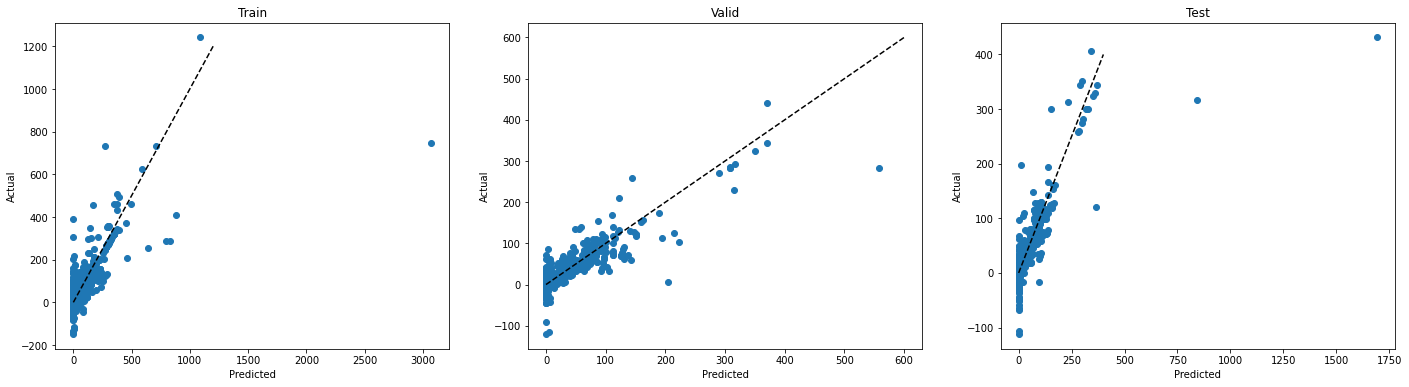

In [ ]:
# Scatterplots
plt.figure(figsize=(24, 6))
# train
plt.subplot(1, 3, 1) 
plt.scatter(x=y_train, y=train_preds)
plt.plot([0, 1200], [0, 1200], '--k')
plt.title('Train')
plt.ylabel('Actual')
plt.xlabel('Predicted')
# valid
plt.subplot(1, 3, 2) 
plt.scatter(x=y_valid, y=valid_preds)
plt.plot([0, 600], [0, 600], '--k')
plt.title('Valid')
plt.ylabel('Actual')
plt.xlabel('Predicted')
# test
plt.subplot(1, 3, 3) 
plt.scatter(x=y_test, y=test_preds)
plt.plot([0, 400], [0, 400], '--k')
plt.title('Test')
plt.ylabel('Actual')
plt.xlabel('Predicted')

plt.show()

In [ ]:
# R2
from sklearn.metrics import r2_score
print("train R2:", r2_score(y_train, train_preds)) # train
print("valid R2:", r2_score(y_valid, valid_preds)) # valid
print("test R2:", r2_score(y_test, test_preds)) # test

train R2: 0.6493108233384641
valid R2: 0.7771342636247044
test R2: 0.5880799609426832


In [ ]:
# MAE
from sklearn.metrics import mean_absolute_error 
print("train MAE:", mean_absolute_error(y_train, train_preds)) # train
print("valid MAE:", mean_absolute_error(y_valid, valid_preds)) # valid
print("test MAE:", mean_absolute_error(y_test, test_preds)) # test

train MAE: 15.64232971447793
valid MAE: 15.327204720243278
test MAE: 17.930430020299024


In [ ]:
# MSE
from sklearn.metrics import mean_squared_error
print("train MSE:", mean_squared_error(y_train, train_preds)) # train
print("valid MSE:", mean_squared_error(y_valid, valid_preds)) # valid
print("test MSE:", mean_squared_error(y_test, test_preds)) # test

train MSE: 1919.9316987156299
valid MSE: 725.2669893611125
test MSE: 3580.5327890627004


### Model 2

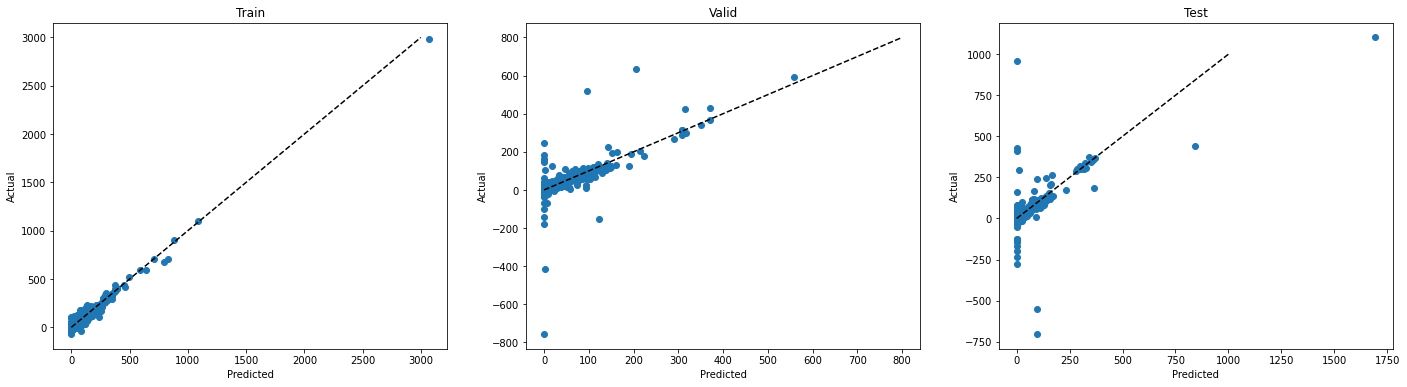

In [ ]:
# Scatterplots
plt.figure(figsize=(24, 6))
# train
plt.subplot(1, 3, 1) 
plt.scatter(x=y2_train_poly, y=train_preds2)
plt.plot([0, 3000], [0, 3000], '--k')
plt.title('Train')
plt.ylabel('Actual')
plt.xlabel('Predicted')
# valid
plt.subplot(1, 3, 2) 
plt.scatter(x=y2_valid_poly, y=valid_preds2)
plt.plot([0, 800], [0, 800], '--k')
plt.title('Valid')
plt.ylabel('Actual')
plt.xlabel('Predicted')
# test
plt.subplot(1, 3, 3) 
plt.scatter(x=y2_test_poly, y=test_preds2)
plt.plot([0, 1000], [0, 1000], '--k')
plt.title('Test')
plt.ylabel('Actual')
plt.xlabel('Predicted')

plt.show()

In [ ]:
# R2
from sklearn.metrics import r2_score
print("train R2:", r2_score(y2_train_poly, train_preds2)) # train
print("valid R2:", r2_score(y2_valid_poly, valid_preds2)) # valid
print("test R2:", r2_score(y2_test_poly, test_preds2)) # test

train R2: 0.9620965741743522
valid R2: 0.2261296777216807
test R2: 0.37464327735559944


In [ ]:
# MAE
from sklearn.metrics import mean_absolute_error 
print("train MAE:", mean_absolute_error(y2_train_poly, train_preds2)) # train
print("valid MAE:", mean_absolute_error(y2_valid_poly, valid_preds2)) # valid
print("test MAE:", mean_absolute_error(y2_test_poly, test_preds2)) # test

train MAE: 9.39139540129873
valid MAE: 16.396828776647517
test MAE: 20.716779526203695


In [ ]:
# MSE
from sklearn.metrics import mean_squared_error
print("train MSE:", mean_squared_error(y2_train_poly, train_preds2)) # train
print("valid MSE:", mean_squared_error(y2_valid_poly, valid_preds2)) # valid
print("test MSE:", mean_squared_error(y2_test_poly, test_preds2)) # test

train MSE: 207.51136212798767
valid MSE: 2518.3889094982737
test MSE: 5435.788594828482


### Model 3

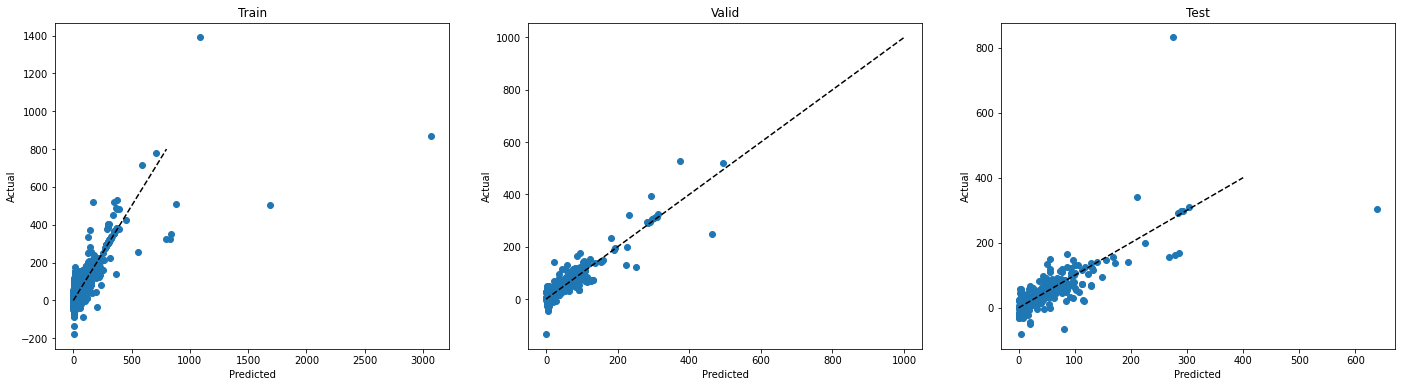

In [ ]:
# Scatterplots
plt.figure(figsize=(24, 6))
# train
plt.subplot(1, 3, 1) 
plt.scatter(x=y3_train, y=train_preds3)
plt.plot([0, 800], [0, 800], '--k')
plt.title('Train')
plt.ylabel('Actual')
plt.xlabel('Predicted')
# valid
plt.subplot(1, 3, 2) 
plt.scatter(x=y3_valid, y=valid_preds3)
plt.plot([0, 1000], [0, 1000], '--k')
plt.title('Valid')
plt.ylabel('Actual')
plt.xlabel('Predicted')
# test
plt.subplot(1, 3, 3) 
plt.scatter(x=y3_test, y=test_preds3)
plt.plot([0, 400], [0, 400], '--k')
plt.title('Test')
plt.ylabel('Actual')
plt.xlabel('Predicted')

plt.show()

In [ ]:
# R2
from sklearn.metrics import r2_score
print("train R2:", r2_score(y3_train, train_preds3)) # train
print("valid R2:", r2_score(y3_valid, valid_preds3)) # valid
print("test R2:", r2_score(y3_test, test_preds3)) # test

train R2: 0.6489838982835054
valid R2: 0.8315770737691758
test R2: 0.4909272639840897


In [ ]:
# MAE
from sklearn.metrics import mean_absolute_error 
print("train MAE:", mean_absolute_error(y3_train, train_preds3)) # train
print("valid MAE:", mean_absolute_error(y3_valid, valid_preds3)) # valid
print("test MAE:", mean_absolute_error(y3_test, test_preds3)) # test

train MAE: 19.280236835290335
valid MAE: 17.01351499588944
test MAE: 19.015929195733435


In [ ]:
# MSE
from sklearn.metrics import mean_squared_error
print("train MSE:", mean_squared_error(y3_train, train_preds3)) # train
print("valid MSE:", mean_squared_error(y3_valid, valid_preds3)) # valid
print("test MSE:", mean_squared_error(y3_test, test_preds3)) # test

train MSE: 2993.198364154154
valid MSE: 761.0605441388658
test MSE: 1711.5526585347206


### Model 4

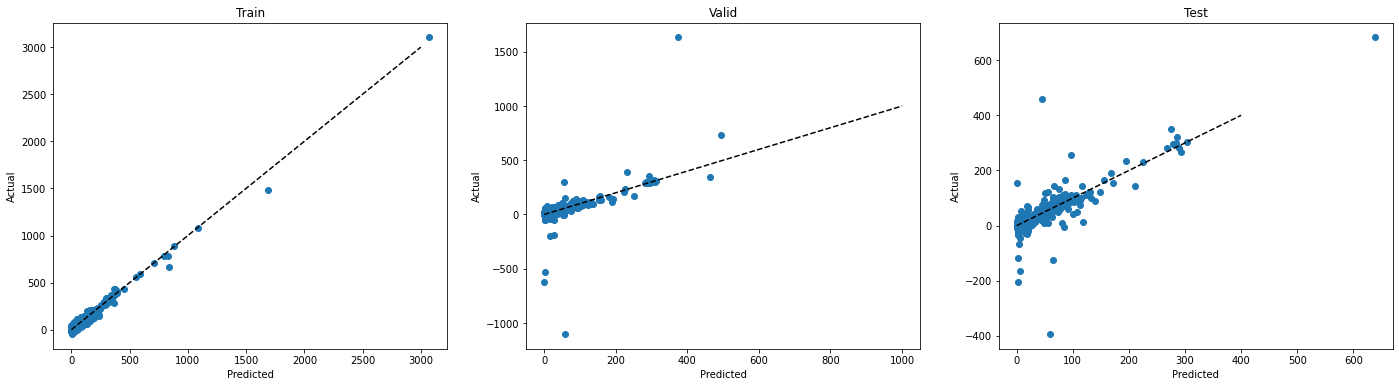

In [ ]:
# Scatterplots
plt.figure(figsize=(24, 6))
# train
plt.subplot(1, 3, 1) 
plt.scatter(x=y4_train_poly, y=train_preds4)
plt.plot([0, 3000], [0, 3000], '--k')
plt.title('Train')
plt.ylabel('Actual')
plt.xlabel('Predicted')
# valid
plt.subplot(1, 3, 2) 
plt.scatter(x=y4_valid_poly, y=valid_preds4)
plt.plot([0, 1000], [0, 1000], '--k')
plt.title('Valid')
plt.ylabel('Actual')
plt.xlabel('Predicted')
# test
plt.subplot(1, 3, 3) 
plt.scatter(x=y4_test_poly, y=test_preds4)
plt.plot([0, 400], [0, 400], '--k')
plt.title('Test')
plt.ylabel('Actual')
plt.xlabel('Predicted')

plt.show()

In [ ]:
# R2
from sklearn.metrics import r2_score
print("train R2:", r2_score(y4_train_poly, train_preds4)) # train
print("valid R2:", r2_score(y4_valid_poly, valid_preds4)) # valid
print("test R2:", r2_score(y4_test_poly, test_preds4)) # test

train R2: 0.9754095640187991
valid R2: -1.1273593434703755
test R2: 0.49974381778886556


In [ ]:
# MAE
from sklearn.metrics import mean_absolute_error 
print("train MAE:", mean_absolute_error(y4_train_poly, train_preds4)) # train
print("valid MAE:", mean_absolute_error(y4_valid_poly, valid_preds4)) # valid
print("test MAE:", mean_absolute_error(y4_test_poly, test_preds4)) # test

train MAE: 9.781229606977504
valid MAE: 24.168890642657587
test MAE: 16.48229750668856


In [ ]:
# MSE
from sklearn.metrics import mean_squared_error
print("train MSE:", mean_squared_error(y4_train_poly, train_preds4)) # train
print("valid MSE:", mean_squared_error(y4_valid_poly, valid_preds4)) # valid
print("test MSE:", mean_squared_error(y4_test_poly, test_preds4)) # test

train MSE: 209.68853677321022
valid MSE: 9612.998038649152
test MSE: 1681.9105366215038


##Advanced


In [ ]:
# 1) R2 value - look at the documentation: actual, predicted
print("This is train R2:", r2_score(y_train, train_preds)) # train
print("This is test R2:", r2_score(y_test, test_preds)) # test

# 2) mae- look at the documentation: actual, predicted
trainMAE = mean_absolute_error(y_train, train_preds2)
print("This is trainMAE:", trainMAE) # train
testMAE = mean_absolute_error(y_test, test_preds2)
print("This is testMAE:", testMAE) # test

# 3) mse- look at the documentation: actual, predicted
trainMSE = mean_squared_error(y_train, train_preds)
print("This is trainMSE:", trainMSE)
testMSE = mean_squared_error(y_test, test_preds)
print("This is testMSE:", testMSE)

# values between 0 and +Inf
# values closer to 0 are better

This is train R2: 0.6493108233384641
This is test R2: 0.5880799609426832
This is trainMAE: 9.39139540129873
This is testMAE: 20.716779526203695
This is trainMSE: 1919.9316987156299
This is testMSE: 3580.5327890627004


# Modeling (Classification)

##Model 5: Logistic Regression

In [ ]:
df['Data.Cholesterollr'] = np.where(df['Data.Cholesterol'] > np.median(df['Data.Cholesterol']), 1, 0)

Xlr = df.drop(['Data.Cholesterollr','Data.Cholesterol', 'Category', 'Description', 'Nutrient Data Bank Number'], axis=1) # drop target column and other useless volumns
ylr = df['Data.Cholesterollr'] # target 

Xlr = np.array(Xlr)
ylr = np.array(ylr)

# split train set
Xlr_train, Xlr_rem, ylr_train, ylr_rem = train_test_split(Xlr, ylr,
                                                  train_size = 0.8,
                                                  shuffle = True,
                                                  random_state = 4)

# split valid and test set
Xlr_valid, Xlr_test, ylr_valid, ylr_test = train_test_split(Xlr_rem, ylr_rem, 
                                                    test_size = 0.5,
                                                    shuffle = True,
                                                    random_state = 4)

print(Xlr_train.shape, Xlr_valid.shape, Xlr_test.shape, ylr_train.shape, ylr_valid.shape, ylr_test.shape)

# convert to array
Xlr_train = np.array(Xlr_train)
Xlr_valid = np.array(Xlr_valid)
Xlr_test = np.array(Xlr_test)
ylr_train = np.array(ylr_train)
ylr_valid = np.array(ylr_valid)
ylr_test = np.array(ylr_test)

(5100, 35) (637, 35) (638, 35) (5100,) (637,) (638,)


In [ ]:
from sklearn.linear_model import LogisticRegression 
LR5 = LogisticRegression()
LR5 = LR5.fit(Xlr_train, ylr_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
train_preds5 = LR5.predict(Xlr_train)
valid_preds5 = LR5.predict(Xlr_valid)
test_preds5 = LR5.predict(Xlr_test)

##Model 6: Logistic Regression (polynomial and interaction terms)


In [ ]:
# polynomial and interaction terms
poly = PolynomialFeatures(2) 
X6 = poly.fit_transform(Xlr)

X6 = pd.DataFrame(X6)
X6.head() 

,0,1,2,3,4,5,6,7,8,9,...,656,657,658,659,660,661,662,663,664,665
0,1.0,0.0,4.0,0.0,4.87,17.9,0.0,0.0,0.0,0.110,...,0.01,0.003,0.02,0.487,0.0009,0.006,0.1461,0.04,0.974,23.7169
1,1.0,0.0,7.0,0.0,4.67,17.8,0.0,0.0,0.0,0.105,...,0.00,0.000,0.00,0.000,0.0025,0.015,0.2335,0.09,1.401,21.8089
2,1.0,0.0,7.0,0.0,4.46,16.0,0.0,0.0,0.0,0.043,...,0.81,0.072,0.27,4.014,0.0064,0.024,0.3568,0.09,1.338,19.8916
3,1.0,0.0,7.0,0.0,4.67,17.8,0.0,0.0,0.0,0.105,...,0.00,0.000,0.00,0.000,0.0025,0.015,0.2335,0.09,1.401,21.8089
4,1.0,0.0,1.0,0.0,5.19,17.4,0.0,0.0,0.0,0.113,...,0.00,0.000,0.00,0.000,0.0004,0.002,0.1038,0.01,0.519,26.9361


In [ ]:
X6_train_poly, X6_rem_poly, y6_train_poly, y6_rem_poly = train_test_split(X6, 
                                                        y, 
                                                        train_size = 0.8, 
                                                        random_state=4) 

# split valid and test set
X6_valid_poly, X6_test_poly, y6_valid_poly, y6_test_poly = train_test_split(X6_rem_poly, y6_rem_poly, 
                                                    test_size = 0.5,
                                                    shuffle = True,
                                                    random_state = 4)

print(X6_train_poly.shape, X6_valid_poly.shape, X6_test_poly.shape, y6_train_poly.shape, y6_valid_poly.shape, y6_test_poly.shape)

# convert these all to numpy arrays
X6_train_poly = np.array(X6_train_poly)
X6_valid_poly = np.array(X6_valid_poly)
X6_test_poly = np.array(X6_test_poly)
y6_train_poly = np.array(y6_train_poly)
y6_valid_poly = np.array(y6_valid_poly)
y6_test_poly = np.array(y6_test_poly)

(5100, 666) (637, 666) (638, 666) (5100,) (637,) (638,)


In [ ]:
LR = LogisticRegression()
LR.fit(X6_train_poly, y6_train_poly)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [ ]:
train_preds6 = LR.predict(X6_train_poly)
valid_preds6 = LR.predict(X6_valid_poly)
test_preds6 = LR.predict(X6_test_poly)

# Analyzing and interpreting classification errors

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

## Model 5

###Confusion Matrix

Text(1140.3176470588237, 0.5, 'True')

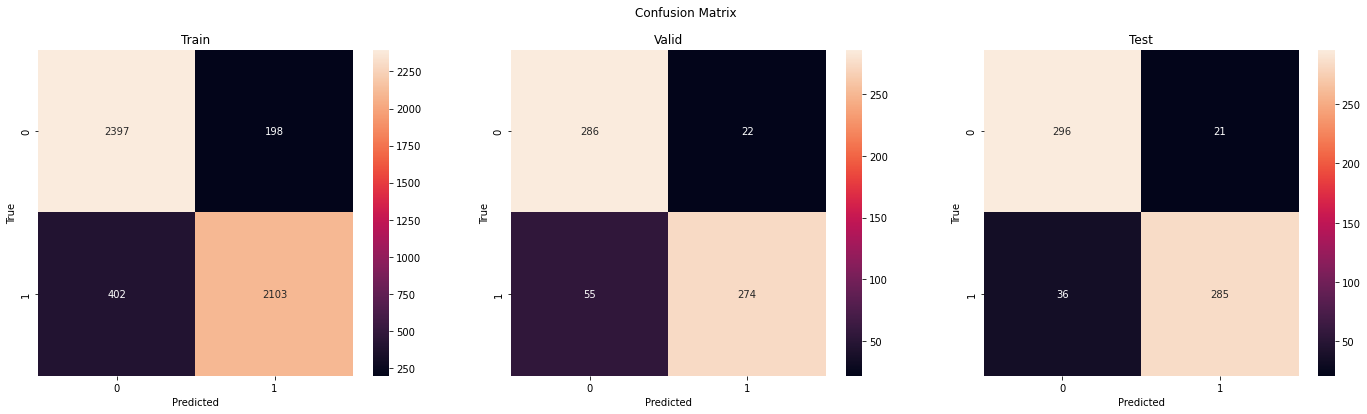

In [ ]:
plt.figure(figsize=(24, 6))
plt.suptitle('Confusion Matrix')

# train
plt.subplot(1, 3, 1) 
matrix = confusion_matrix(ylr_train, train_preds5)
sns.heatmap(matrix, annot=True, fmt="d")
plt.title('Train')
plt.xlabel('Predicted')
plt.ylabel('True')

# valid
plt.subplot(1, 3, 2) 
matrix = confusion_matrix(ylr_valid, valid_preds5)
sns.heatmap(matrix, annot=True, fmt="d")
plt.title('Valid')
plt.xlabel('Predicted')
plt.ylabel('True')

# test
plt.subplot(1, 3, 3) 
matrix = confusion_matrix(ylr_test, test_preds5)
sns.heatmap(matrix, annot=True, fmt="d")
plt.title('Test')
plt.xlabel('Predicted')
plt.ylabel('True')

###Classification Report

In [ ]:
print('Train', classification_report(ylr_train, train_preds5))
print('-'*60)
print('Valid', classification_report(ylr_valid, valid_preds5))
print('-'*60)
print('Test', classification_report(ylr_test, test_preds5))

Train               precision    recall  f1-score   support

           0       0.86      0.92      0.89      2595
           1       0.91      0.84      0.88      2505

    accuracy                           0.88      5100
   macro avg       0.89      0.88      0.88      5100
weighted avg       0.88      0.88      0.88      5100

------------------------------------------------------------
Valid               precision    recall  f1-score   support

           0       0.84      0.93      0.88       308
           1       0.93      0.83      0.88       329

    accuracy                           0.88       637
   macro avg       0.88      0.88      0.88       637
weighted avg       0.88      0.88      0.88       637

------------------------------------------------------------
Test               precision    recall  f1-score   support

           0       0.89      0.93      0.91       317
           1       0.93      0.89      0.91       321

    accuracy                           0.91

##Model 6

###Confusion Matrix

In [ ]:
# Can't run, So I commented out

#plt.figure(figsize=(24, 6))
#plt.suptitle('Confusion Matrix')

# train
#plt.subplot(1, 3, 1) 
#matrix = confusion_matrix(y6_train_poly, train_preds6)
#sns.heatmap(matrix, annot=True, fmt="d")
#plt.title('Train')
#plt.xlabel('Predicted')
#plt.ylabel('True')

# valid
#plt.subplot(1, 3, 2) 
#matrix = confusion_matrix(y6_valid_poly, valid_preds6)
#sns.heatmap(matrix, annot=True, fmt="d")
#plt.title('Valid')
#plt.xlabel('Predicted')
#plt.ylabel('True')

# test
#plt.subplot(1, 3, 3) 
#matrix = confusion_matrix(y6_test_poly, test_preds6)
#sns.heatmap(matrix, annot=True, fmt="d")
#plt.title('Test')
#plt.xlabel('Predicted')
#plt.ylabel('True')

###Classification Report

In [ ]:
print('Train', classification_report(y6_train_poly, train_preds6))
print('-'*60)
print('Valid', classification_report(y6_valid_poly, valid_preds6))
print('-'*60)
print('Test', classification_report(y6_test_poly, test_preds6))

Train               precision    recall  f1-score   support

           0       0.35      0.95      0.51      1801
           1       0.00      0.00      0.00       123
           2       0.42      0.05      0.09       213
           3       0.00      0.00      0.00       103
           4       0.20      0.01      0.02       118
           5       0.00      0.00      0.00        53
           6       0.00      0.00      0.00        48
           7       0.12      0.02      0.03        62
           8       0.00      0.00      0.00        74
           9       0.00      0.00      0.00        32
          10       0.00      0.00      0.00        54
          11       0.00      0.00      0.00        51
          12       0.00      0.00      0.00        48
          13       0.00      0.00      0.00        57
          14       0.50      0.02      0.03        56
          15       0.00      0.00      0.00        29
          16       0.00      0.00      0.00        44
          17       0.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classificat

# Conclusion
> We can see a lot of variation of nutrient content across different food categories.

> Through different correlation matrices, we were able to see which nutritional data was highly correlated with each other. We observed that cholesterol has a high correlation with both choline and protein in this dataset.

> Observed that sugars, sugar substitutes and candies have the highest NetCarbs and that proteins have the lowest NetCarbs.

> Ran multiple models for predicting the cholesterol value based on predictive variables i.e. other nutrients. 

### **Regression Models**

> **Model 2 **(Linear Regression with Polynomial Features) performed the best on training data, however it tended to overfit for validation and test data.

> **Model 4 **(Linear Regression with Polynomial Features, with Cholesterol = 0 removed) performed the best on test dataset without overfitting

### **Classification Models**

> Classification **Model 5** has an accuracy of 1 of 88.4% with a precision of 91% for test data

> Classification **Model 5** has an accuracy of 1 of 83.3% with a precision of 88% for validation dataset